In [2]:
import pandas as pd
import numpy as np

np.random.seed(1)

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from datetime import datetime
#from keras import tensorflow as tf
import tensorflow as tf

In [5]:
f_name = '../data/all_data_s.npy'

np_input_full = np.array(np.load(f_name)).astype(np.float32)

In [6]:
#np_input=np_input_full[0:1000,:]    this does not work?
np_input=np_input_full

In [ ]:
X=np_input[:,0:768]
y=np_input[:,770:1538]

img_rows=24
img_cols=32

X=np.array([row.reshape(img_rows,img_cols) for row in X])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 5, random_state=1)

y_train_img = np.array([row.reshape(img_rows,img_cols) for row in y_train])
y_val_img=np.array([row.reshape(img_rows,img_cols) for row in y_val])

In [8]:

model = Sequential([

    # First Convolutional Block
    Conv2D(filters=5, kernel_size=3, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=[img_rows,img_cols, 1]),   #(120950, 24, 32)
    MaxPool2D(),

    # Second Convolutional Block
    Conv2D(filters=5, kernel_size=3, activation="relu", padding='same'),
    MaxPool2D(),

    # Third Convolutional Block
    Conv2D(filters=5, kernel_size=3, activation="relu", padding='same'),
    MaxPool2D(),

    # Classifier Head
    Flatten(),
    Dense(units=300, activation="relu"),
    Dense(units=768, activation="relu"),
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 32, 5)         50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 16, 5)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 16, 5)         230       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 8, 5)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 8, 5)           230       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 4, 5)          0

"#This is the best model we found. For additional models, check out I_notebook.ipynb\nstart = datetime.now()\nmodel = Sequential()\nmodel.add(Flatten(input_shape=X_train.shape[1:]))\nmodel.add(Dense(300, activation=LeakyReLU(alpha=0.3)))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(200, activation=LeakyReLU(alpha=0.3)))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(100,activation='relu'))\nmodel.compile(loss='categorical_crossentropy',\n   optimizer='adam',\n   metrics=['acc'])\nhistory = model.fit(X_train, y_train,\n   epochs=7,\n   batch_size=batch_size,\n   validation_data=(X_val, y_val))\n#model.save_weights(top_model_weights_path)\n(eval_loss, eval_accuracy) = model.evaluate(\n    X_val, y_val, batch_size=batch_size,     verbose=1)\n#print(“[INFO] accuracy: {:.2f}%”.format(eval_accuracy * 100))\n#print(“[INFO] Loss: {}”.format(eval_loss))\nend= datetime.now()\nelapsed= end-start\nprint ('Time: ', elapsed)"

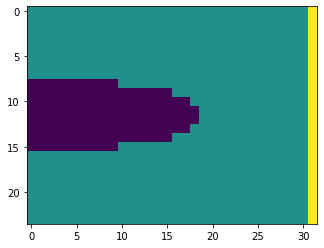

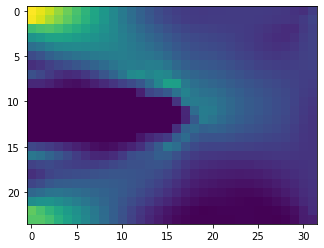

(120955, 24, 32)

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(X_train[50], interpolation='nearest')
plt.show()

plt.imshow(y_train_img[50], interpolation='nearest')
plt.show()

X_train.shape

In [12]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='mean_squared_error',
    metrics=['mean_squared_error']
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),   #X_val
    epochs=40,
    verbose=1,
)


Epoch 1/40
3780/3780 [==============================] - 29s 8ms/step - loss: 8721.0781 - mean_squared_error: 8721.0781 - val_loss: 4554.1973 - val_mean_squared_error: 4554.1973
Epoch 2/40
3780/3780 [==============================] - 28s 7ms/step - loss: 7361.3047 - mean_squared_error: 7361.3047 - val_loss: 4050.0476 - val_mean_squared_error: 4050.0476
Epoch 3/40
3780/3780 [==============================] - 30s 8ms/step - loss: 6948.8408 - mean_squared_error: 6948.8408 - val_loss: 3646.9766 - val_mean_squared_error: 3646.9766
Epoch 4/40
3780/3780 [==============================] - 31s 8ms/step - loss: 6763.6143 - mean_squared_error: 6763.6143 - val_loss: 3940.9426 - val_mean_squared_error: 3940.9426
Epoch 5/40
3780/3780 [==============================] - 31s 8ms/step - loss: 6637.5737 - mean_squared_error: 6637.5737 - val_loss: 3542.4414 - val_mean_squared_error: 3542.4414
Epoch 6/40
3780/3780 [==============================] - 30s 8ms/step - loss: 6498.4146 - mean_squared_error: 6498.4

In [148]:
X_train.shape

(120950, 24, 32)

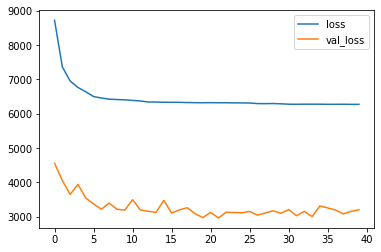

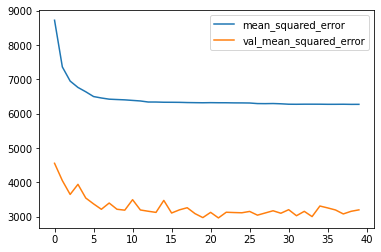

In [15]:
import pandas as pd

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['mean_squared_error', 'val_mean_squared_error']].plot();

In [ ]:
predRowStart=0
predRowFin=20
predictions=model.predict(
    #X_val[0:10],
    X_val[predRowStart:predRowFin],
    verbose=2
)

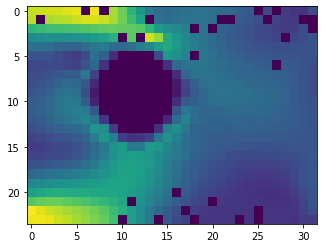

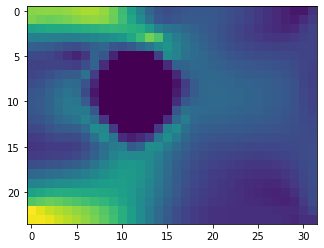

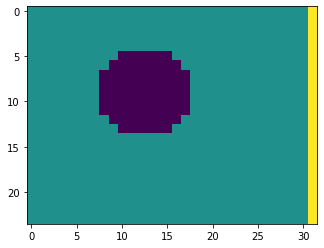

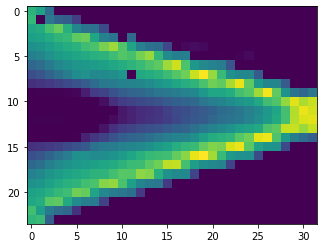

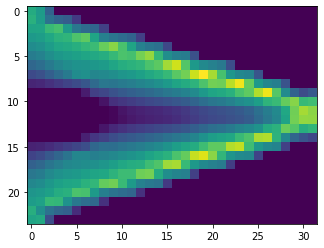

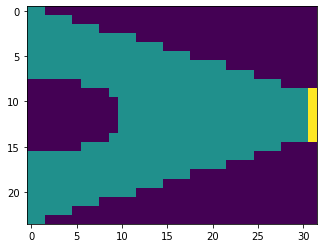

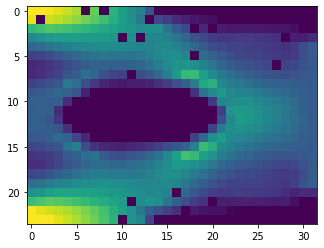

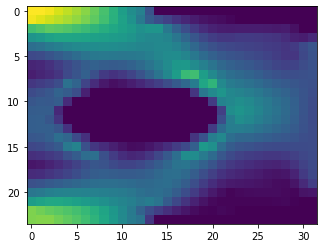

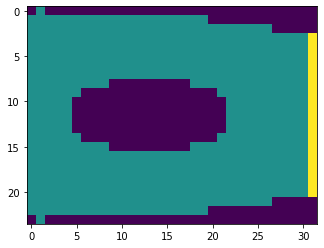

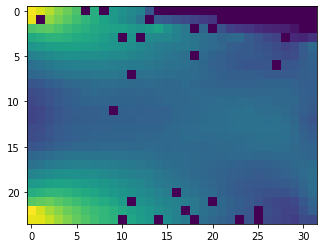

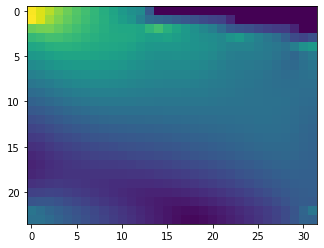

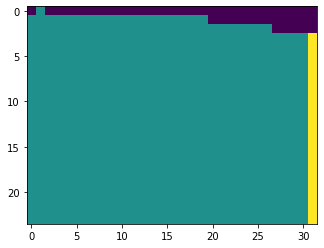

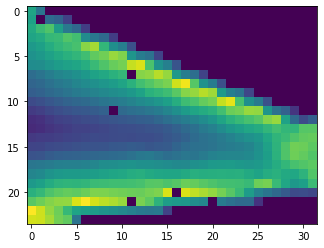

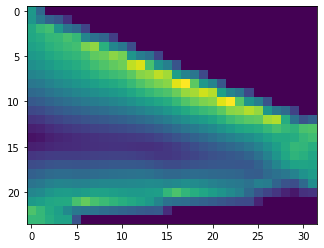

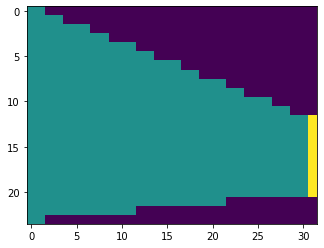

IndexError: index 5 is out of bounds for axis 0 with size 5

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt

predic=np.array([row.reshape(img_rows,img_cols) for row in predictions])

for row in range(predRowStart,predRowFin):
    plt.imshow(predic[row], interpolation='nearest')
    plt.show()

    plt.imshow(y_val_img[row], interpolation='nearest')
    plt.show()

    plt.imshow(X_val[row], interpolation='nearest')
    plt.show()

#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 5, random_state=1) d
